In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ts_data = pd.read_csv('tempdegreeF.csv')


In [57]:
ts_data["Month"]=pd.to_datetime(ts_data['Month'])
print(type(ts_data["Month"][0]))
ts_data =ts_data.set_index(["Month"])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [58]:
type(ts_data)

pandas.core.frame.DataFrame

In [59]:
ts_data.head(5)

,#temp_degreeF
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


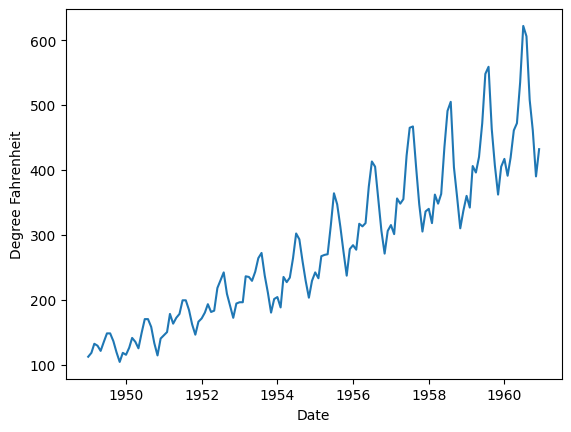

In [60]:
plt.xlabel("Date")
plt.ylabel("Degree Fahrenheit")
plt.plot(ts_data)

In [61]:
rol_mean=ts_data.rolling(window=12).mean()
rol_std =ts_data.rolling(window=12).std()


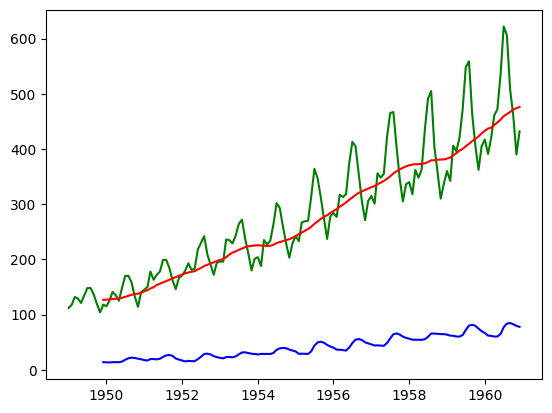

In [62]:
plt.plot(ts_data,c="green")
plt.plot(rol_mean,c="red")
plt.plot(rol_std,c="blue")

In [63]:
from statsmodels.tsa.stattools import adfuller

adftest=adfuller(ts_data["#temp_degreeF"])
print(adftest)

(0.8153688792060441, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


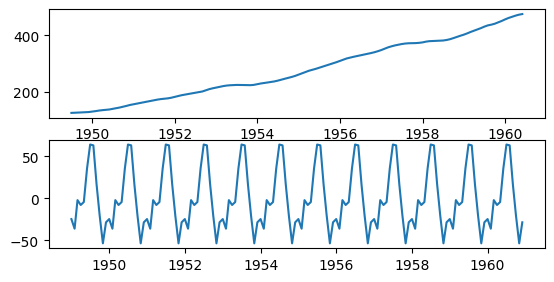

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts_data)

trend=decompose.trend
seasonal=decompose.seasonal

plt.subplot(311)
plt.plot(trend)
plt.subplot(312)
plt.plot(seasonal)

# conversion

In [65]:
print(ts_data["#temp_degreeF"] - ts_data["#temp_degreeF"].shift(2))
new_ts=ts_data["#temp_degreeF"] - ts_data["#temp_degreeF"].shift(2)
new_ts

Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01     20.0
1949-04-01     11.0
1949-05-01    -11.0
              ...  
1960-08-01     71.0
1960-09-01   -114.0
1960-10-01   -145.0
1960-11-01   -118.0
1960-12-01    -29.0
Name: #temp_degreeF, Length: 144, dtype: float64


Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01     20.0
1949-04-01     11.0
1949-05-01    -11.0
              ...  
1960-08-01     71.0
1960-09-01   -114.0
1960-10-01   -145.0
1960-11-01   -118.0
1960-12-01    -29.0
Name: #temp_degreeF, Length: 144, dtype: float64

In [66]:
adfuller(new_ts.dropna())

(-2.9616951355554235,
 0.03862975767698849,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 985.7309222414161)

In [67]:
new_ts

Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01     20.0
1949-04-01     11.0
1949-05-01    -11.0
              ...  
1960-08-01     71.0
1960-09-01   -114.0
1960-10-01   -145.0
1960-11-01   -118.0
1960-12-01    -29.0
Name: #temp_degreeF, Length: 144, dtype: float64

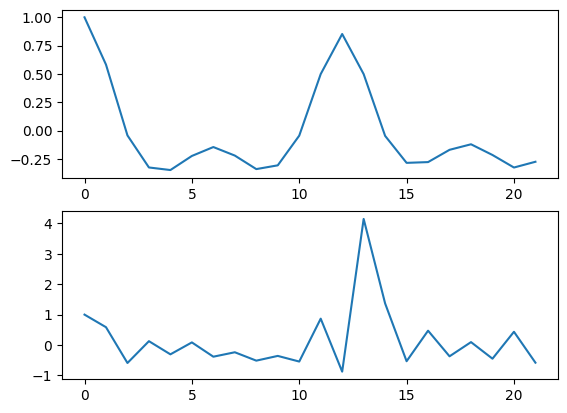

In [68]:
from statsmodels.tsa.stattools import acf,pacf
d_acf=acf(new_ts.dropna())
d_pacf=pacf(new_ts.dropna())
plt.subplot(211)
plt.plot(d_acf)
plt.subplot(212)
plt.plot(d_pacf)

In [69]:
from statsmodels.tsa.arima.model import ARIMA
model =ARIMA(ts_data,order=(2,2,1),seasonal_order=(2,2,1,12))
model_fit =model.fit()


C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

In [70]:
res =model_fit.forecast(24)

In [71]:

res=pd.DataFrame(res)
res.columns=["#temp_degreeF"]
final_data =pd.DataFrame(ts_data)
pred_data=final_data.append(res)
type(pred_data)

C:\Users\Hashim\AppData\Local\Temp\ipykernel_29860\1406305139.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_data=final_data.append(res)


pandas.core.frame.DataFrame

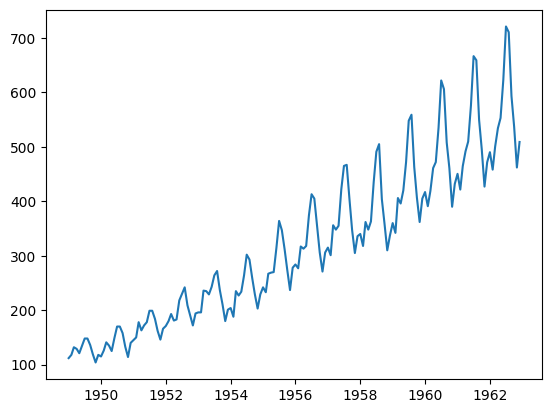

In [72]:
plt.plot(pred_data)